In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('pdxDevJobs.csv')

In [9]:
df = df.drop(['Unnamed: 0'], axis=1)

In [32]:
pd.set_option('display.max_columns', 29)

In [33]:
df.head(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,average_salary,company_fullname,in_PDX,age,javascript_yn,react_yn,node_yn,mongodb_yn,heroku_yn,webpack_yn,simplfied_title,simplified_title,seniority
0,Software Developer,$52K-$94K (Glassdoor est.),We're looking for a Software Developer to join...,3.6,Suvoda\r\n3.6,"Portland, OR","Conshohocken, PA",201 to 500 employees,2012,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,52,94,73.0,Suvoda\r\n,True,8,False,False,False,False,False,False,software developer,software developer,na
1,Software Developer,$52K-$94K (Glassdoor est.),Cinder is looking for a *Software Engineer* to...,3.4,Cinder Staffing\r\n3.4,"Hillsboro, OR","Beaverton, OR",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Less than $1 million (USD),-1,52,94,73.0,Cinder Staffing\r\n,False,-1,False,False,False,False,False,False,software developer,software developer,na
2,App Developer,$52K-$94K (Glassdoor est.),Essential Functions:\r\n\r\n§ Responsible for ...,3.9,Regional Multiple Listing Service\r\n3.9,"Portland, OR","Portland, OR",1 to 50 employees,-1,Company - Private,Internet,Information Technology,$1 to $5 million (USD),-1,52,94,73.0,Regional Multiple Listing Service\r\n,True,-1,False,False,False,False,False,False,na,na,na
3,Lead Software Engineer,$52K-$94K (Glassdoor est.),Why Smarsh?\r\nOur motto is ‘People First. Ins...,3.5,Smarsh\r\n3.5,"Portland, OR","Portland, OR",501 to 1000 employees,2001,Company - Private,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"Global Relay, NortonLifeLock",52,94,73.0,Smarsh\r\n,True,19,False,True,True,False,False,False,software engineer,software engineer,senior
4,Software Engineer,$52K-$94K (Glassdoor est.),What will you contribute?\r\n\r\nThe Software ...,3.2,Finastra\r\n3.2,"Portland, OR","London, United Kingdom",10000+ employees,2017,Company - Private,Financial Transaction Processing,Finance,$2 to $5 billion (USD),-1,52,94,73.0,Finastra\r\n,True,3,False,False,False,False,False,False,software engineer,software engineer,na
5,Jr. C++ Software Engineer - ArcGIS Runtime SDK,$52K-$94K (Glassdoor est.),Overview\r\n\r\n\r\nDo you have a passion for ...,3.5,Esri\r\n3.5,"Portland, OR","Redlands, CA",1001 to 5000 employees,1969,Company - Private,Computer Hardware & Software,Information Technology,$1 to $2 billion (USD),Pitney Bowes,52,94,73.0,Esri\r\n,True,51,False,False,False,False,False,False,software engineer,software engineer,jr
6,Frontend Software Engineer,$52K-$94K (Glassdoor est.),Your Opportunity\r\n\r\n\r\nThe Developer Expe...,4.5,New Relic\r\n4.5,"Portland, OR","San Francisco, CA",1001 to 5000 employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"AppDynamics, Datadog, Dynatrace",52,94,73.0,New Relic\r\n,True,12,False,True,True,False,False,False,software engineer,software engineer,na
7,Software Engineer,$52K-$94K (Glassdoor est.),Software Engineer - Kafka Platform Team\r\nYou...,4.5,New Relic\r\n4.5,"Portland, OR","San Francisco, CA",1001 to 5000 employees,2008,Company - Public,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"AppDynamics, Datadog, Dynatrace",52,94,73.0,New Relic\r\n,True,12,False,False,False,False,False,False,software engineer,software engineer,na
8,Software Engineer,$52K-$94K (Glassdoor est.),Primary Function\r\n\r\n\r\nWe are seeking an ...,3.7,TeamPeople\r\n3.7,"Hillsboro, OR","Falls Church, VA",501 to 1000 employees,2004,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),"Aquent, Creative Circle, Maslow Media Group",52,94,73.0,TeamPeople\r\n,False,16,False,False,False,False,False,False,software engineer,software engineer,na
9,iOS/Android Runtime SDK Software Engineer,$52K-$94K (Glassdoor est.),Over

In [26]:
def title_simplifier(title):
    if 'software engineer' in title.lower():
        return 'software engineer'
    elif 'software developer' in title.lower():
        return 'software developer'
    elif 'web developer' in title.lower():
        return 'web developer'
    elif 'UX' in title.lower():
        return 'UX'
    elif 'frontend' in title.lower() or 'front-end' in title.lower():
        return 'frontend'
    elif 'backend' in title.lower() or 'back-end' in title.lower():
        return 'backend'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower() or 'entry' in title.lower():
        return 'jr'
    else:
        return 'na'

In [28]:
df['simplified_title'] = df['Job Title'].apply(title_simplifier)

In [29]:
df.simplified_title.value_counts()

software engineer     144
na                     89
software developer     21
web developer           6
frontend                3
backend                 2
Name: simplified_title, dtype: int64

In [24]:
df['seniority'] = df['Job Title'].apply(seniority)

In [25]:
df.seniority.value_counts()

na        160
senior    103
jr          2
Name: seniority, dtype: int64

In [34]:
df['description_length'] = df['Job Description'].apply(lambda x: len(x))

In [35]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,...,average_salary,company_fullname,in_PDX,age,javascript_yn,react_yn,node_yn,mongodb_yn,heroku_yn,webpack_yn,simplfied_title,simplified_title,seniority,description_length
0,Software Developer,$52K-$94K (Glassdoor est.),We're looking for a Software Developer to join...,3.6,Suvoda\r\n3.6,"Portland, OR","Conshohocken, PA",201 to 500 employees,2012,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,...,73.0,Suvoda\r\n,True,8,False,False,False,False,False,False,software developer,software developer,na,2856
1,Software Developer,$52K-$94K (Glassdoor est.),Cinder is looking for a *Software Engineer* to...,3.4,Cinder Staffing\r\n3.4,"Hillsboro, OR","Beaverton, OR",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Less than $1 million (USD),-1,...,73.0,Cinder Staffing\r\n,False,-1,False,False,False,False,False,False,software developer,software developer,na,1962
2,App Developer,$52K-$94K (Glassdoor est.),Essential Functions:\r\n\r\n§ Responsible for ...,3.9,Regional Multiple Listing Service\r\n3.9,"Portland, OR","Portland, OR",1 to 50 employees,-1,Company - Private,Internet,Information Technology,$1 to $5 million (USD),-1,...,73.0,Regional Multiple Listing Service\r\n,True,-1,False,False,False,False,False,False,na,na,na,1080
3,Lead Software Engineer,$52K-$94K (Glassdoor est.),Why Smarsh?\r\nOur motto is ‘People First. Ins...,3.5,Smarsh\r\n3.5,"Portland, OR","Portland, OR",501 to 1000 employees,2001,Company - Private,Computer Hardware & Software,Information Technology,$100 to $500 million (USD),"Global Relay, NortonLifeLock",...,73.0,Smarsh\r\n,True,19,False,True,True,False,False,False,software engineer,software engineer,senior,4266
4,Software Engineer,$52K-$94K (Glassdoor est.),What will you contribute?\r\n\r\nThe Software ...,3.2,Finastra\r\n3.2,"Portland, OR","London, United Kingdom",10000+ employees,2017,Company - Private,Financial Transaction Processing,Finance,$2 to $5 billion (USD),-1,...,73.0,Finastra\r\n,True,3,False,False,False,False,False,False,software engineer,software engineer,na,2341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Software Engineer,$72K-$125K (Glassdoor est.),Advantage Resourcing is seeking a Software Eng...,2.7,Advantage Resourcing\r\n2.7,"Hillsboro, OR","Cincinnati, OH",10000+ employees,1969,Company - Private,Staffing & Outsourcing,Business Services,$1 to $2 billion (USD),"Randstad US, Robert Half, Allegis Group",...,98.5,Advantage Resourcing\r\n,False,51,False,False,False,False,False,False,software engineer,software engineer,na,3431
261,Automation Developer,$72K-$125K (Glassdoor est.),Cinder is looking for an *Automation Developer...,3.4,Cinder Staffing\r\n3.4,"Hillsboro, OR","Beaverton, OR",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Less than $1 million (USD),-1,...,98.5,Cinder Staffing\r\n,False,-1,False,False,False,False,False,False,na,na,na,2073
262,UI/UX Software Engineer,$72K-$125K (Glassdoor est.),Advantage Resourcing is seeking a UI/UX Softwa...,2.7,Advantage Resourcing\r\n2.7,"Hillsboro, OR","Cincinnati, OH",10000+ employees,1969,Company - Private,Staffing & Outsourcing,Business Services,$1 to $2 billion (USD),"Randstad US, Robert Half, Allegis Group",...,98.5,Advantage Resourcing\r\n,False,51,False,True,False,False,False,False,software engineer,software engineer,na,2579
263,Senior Software Analyst - relocation required,$72K-$125K (Glassdoor est.),"The location for this position is in Richland,...",-1.0,Arch Staffing and Consulting,"Portland, OR","Grand Rapids, MI",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,...,98.5,Arch Staffing and Consulting,True,-1,False,False,False,False,False,False,na,na,senior,3632


In [38]:
df['comp_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [39]:
df.comp_count

0      0
1      0
2      0
3      2
4      0
      ..
260    3
261    0
262    3
263    0
264    2
Name: comp_count, Length: 265, dtype: int64

In [40]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplfied_title', 'simplified_title',
       'seniority', 'description_length', 'comp_count'],
      dtype='object')

In [44]:
df['company_fullname'] = df.company_fullname.apply(lambda x: x.replace('\r', ''))

In [45]:
df.company_fullname

0                                 Suvoda
1                        Cinder Staffing
2      Regional Multiple Listing Service
3                                 Smarsh
4                               Finastra
                     ...                
260                 Advantage Resourcing
261                      Cinder Staffing
262                 Advantage Resourcing
263         Arch Staffing and Consulting
264                            eBay Inc.
Name: company_fullname, Length: 265, dtype: object

In [46]:
df.describe()

,Rating,Founded,min_salary,max_salary,average_salary,age,description_length,comp_count
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,3.417358,1537.822642,69.660377,115.147170,92.403774,24.366038,3461.192453,0.939623
std,1.515601,834.667523,25.434812,29.046414,26.360467,34.172662,1652.677340,1.286636
min,-1.000000,-1.000000,36.000000,67.000000,51.500000,-1.000000,132.000000,0.000000
25%,3.300000,1887.000000,52.000000,98.000000,75.000000,4.000000,2299.000000,0.000000
50%,3.700000,1992.000000,66.000000,108.000000,87.000000,16.000000,3431.000000,0.000000
75%,4.200000,2006.000000,72.000000,126.000000,99.000000,28.000000,4508.000000,2.000000
max,5.000000,2018.000000,126.000000,169.000000,137.000000,222.000000,9464.000000,3.000000


<AxesSubplot:>

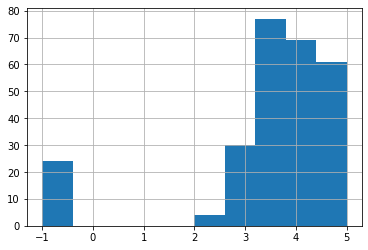

In [47]:
df.Rating.hist()

<AxesSubplot:>

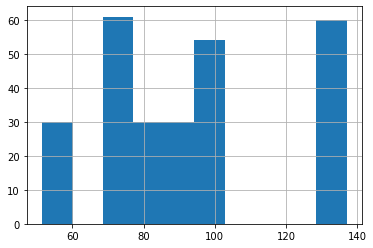

In [48]:
df.average_salary.hist()

In [50]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplfied_title', 'simplified_title',
       'seniority', 'description_length', 'comp_count'],
      dtype='object')

<AxesSubplot:>

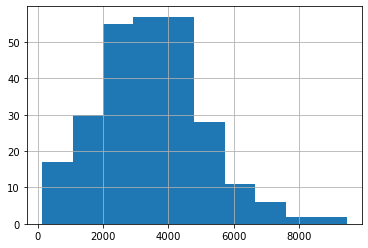

In [51]:
df.description_length.hist()

<AxesSubplot:>

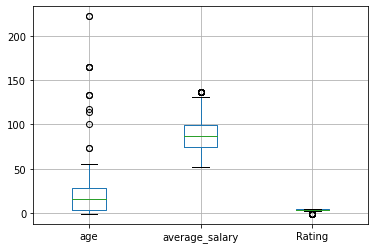

In [53]:
df.boxplot(column = ['age', 'average_salary', 'Rating'])

In [54]:
df[['age', 'average_salary', 'Rating']].corr()

,age,average_salary,Rating
age,1.000000,-0.002688,0.138097
average_salary,-0.002688,1.000000,-0.010212
Rating,0.138097,-0.010212,1.000000


<AxesSubplot:>

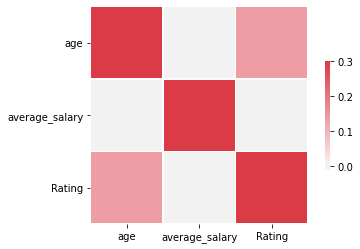

In [57]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'average_salary', 'Rating']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplfied_title', 'simplified_title',
       'seniority', 'description_length', 'comp_count'],
      dtype='object')

In [59]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplified_title',
       'seniority']]

graph for Location: total = 10


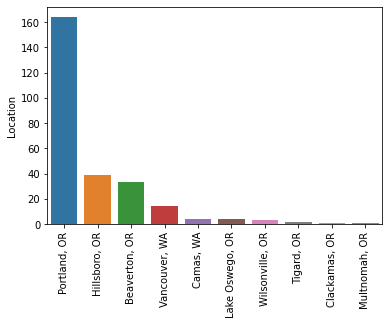

graph for Headquarters: total = 80


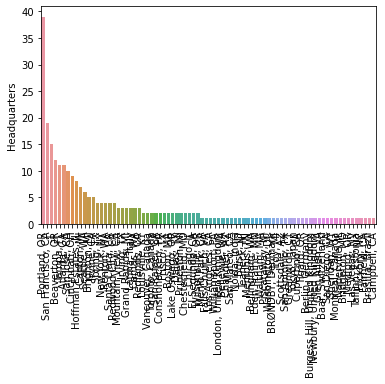

graph for Size: total = 9


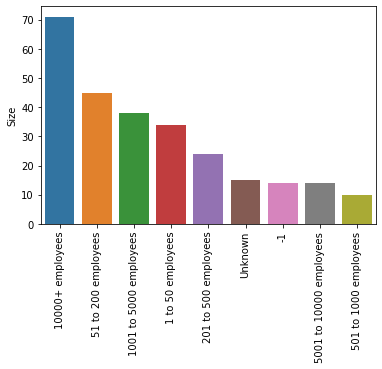

graph for Founded: total = 50


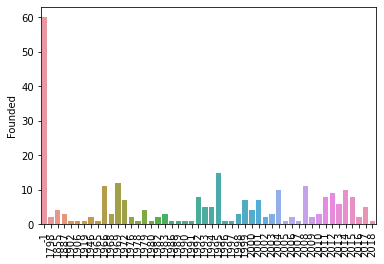

graph for Type of ownership: total = 8


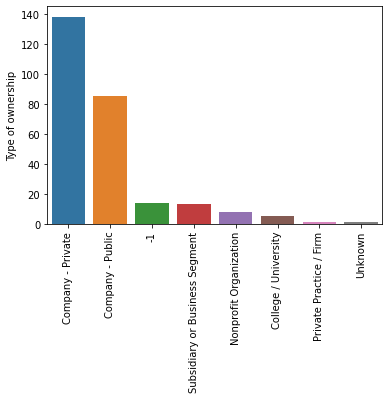

graph for Industry: total = 31


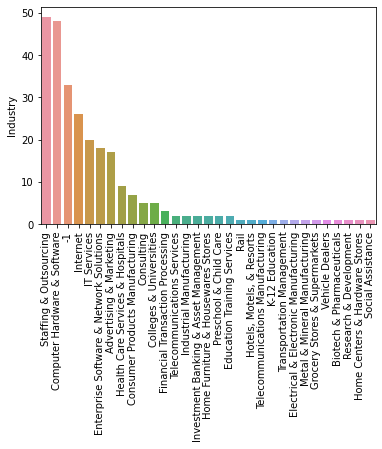

graph for Sector: total = 13


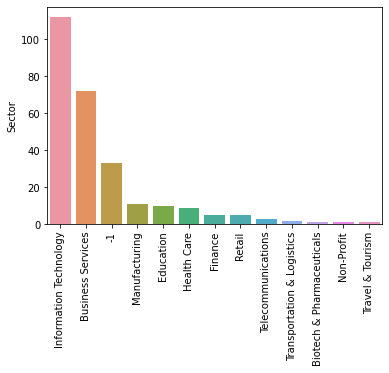

graph for Revenue: total = 14


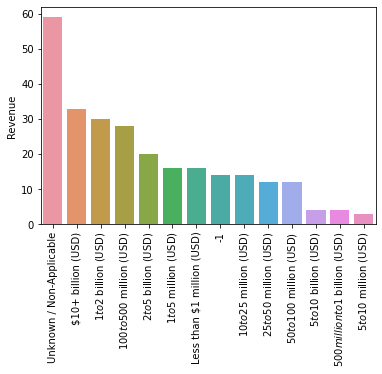

graph for company_fullname: total = 142


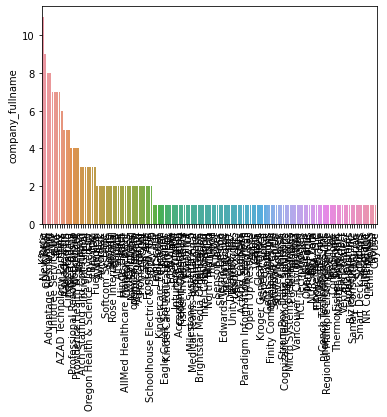

graph for in_PDX: total = 2


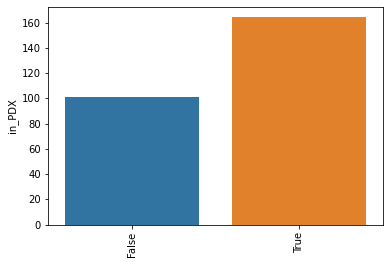

graph for age: total = 50


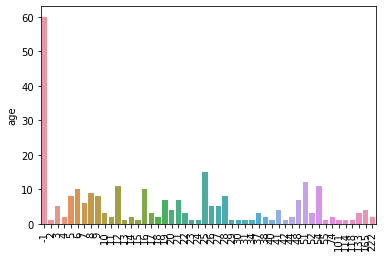

graph for javascript_yn: total = 2


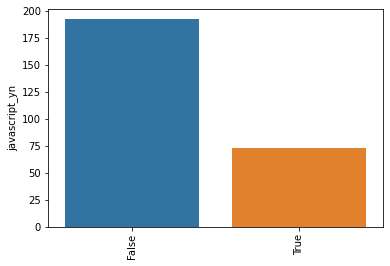

graph for react_yn: total = 2


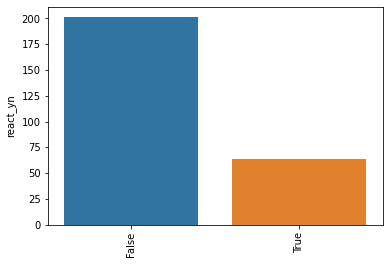

graph for node_yn: total = 2


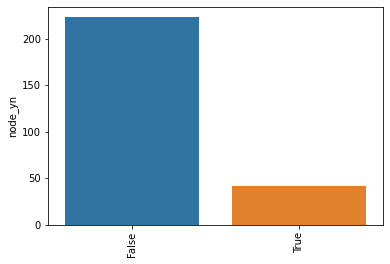

graph for mongodb_yn: total = 2


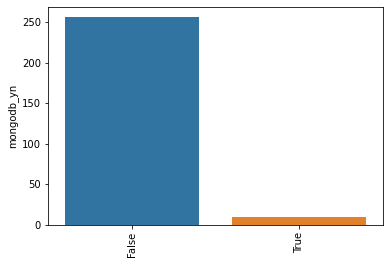

graph for heroku_yn: total = 1


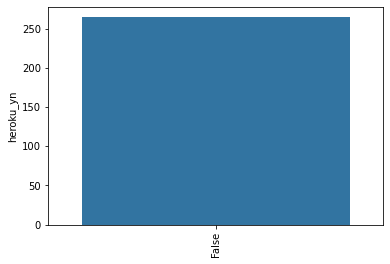

graph for webpack_yn: total = 2


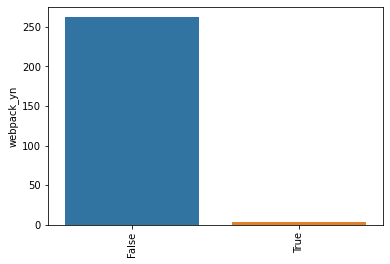

graph for simplified_title: total = 6


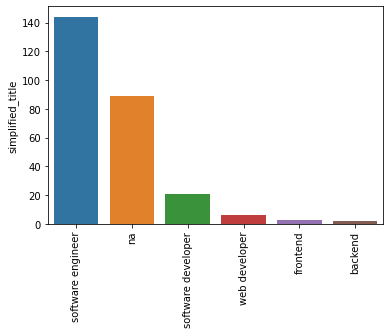

graph for seniority: total = 3


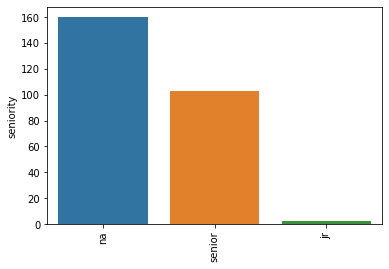

In [62]:
for i in df_cat.columns: 
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Headquarters: total = 25


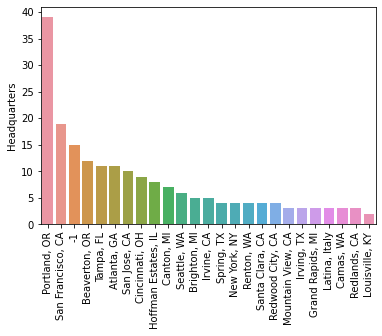

graph for company_fullname: total = 25


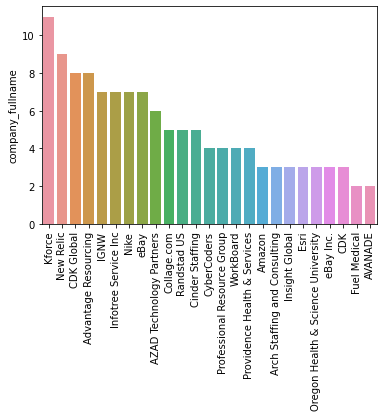

In [75]:
for i in df_cat[['Headquarters', 'company_fullname']].columns: 
    cat_num = df_cat[i].value_counts()[:25]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [76]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'average_salary', 'company_fullname',
       'in_PDX', 'age', 'javascript_yn', 'react_yn', 'node_yn', 'mongodb_yn',
       'heroku_yn', 'webpack_yn', 'simplfied_title', 'simplified_title',
       'seniority', 'description_length', 'comp_count'],
      dtype='object')

In [82]:
descriptionINFO = df['Job Description'].apply(lambda x: x.split(','))

In [83]:
descriptionINFO.value_counts()

[Advantage Resourcing is seeking a UI/UX Software Engineer for our client located in Hillsboro,  OR (Remote initially).\r\n\r\nResponsibilities:\r\n\r\nDesign and implement services,  data handling,  and UIs for data-rich applications in service-oriented architectures.\r\nFollow organizational practices and tools such as agile development,  unit testing,  source code and configuration management,  code reviews,  specifications,  and documentation.\r\nMake practical design choices given limited requirements and defined delivery schedules.\r\n\r\nMinimum Qualifications:\r\n\r\nUniversity degree in Computer Science,  Software Engineering,  or related technical discipline.\r\n5+ years of experience in implementing data-centric UI applications.\r\n2+ years of experience with micro-services architecture patterns and .NET Core development.\r\nDemonstrated expertise with C#,  Angular,  interacting with data layers and APIs,  and related technologies (CSS,  React,  Signal-R,  etc.). Working kno

In [88]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

In [90]:
pip install wordcloud

  Using cached wordcloud-1.7.0.tar.gz (216 kB)
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\users\aaron\appdata\local\programs\python\python38-32\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\aaron\\AppData\\Local\\Temp\\pip-install-z2zyratp\\wordcloud\\setup.py'"'"'; __file__='"'"'C:\\Users\\aaron\\AppData\\Local\\Temp\\pip-install-z2zyratp\\wordcloud\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\aaron\AppData\Local\Temp\pip-record-b_pdi4xx\install-record.txt' --single-version-externally-managed --compile --install-headers 'c:\users\aaron\appdata\local\programs\python\python38-32\Include\wordcloud'
         cwd: C:\Users\aaron\AppData\Local\Temp\pip-install-z2zyratp\wordcloud\
    Complete output (20 lines):
    running install
    running build
    running build_py
    creating build
    creating build\lib.win32-3.8